# Libraries

In [ ]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from re import search

In [ ]:
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import string

import pandas as pd

def search(dataframe: pd.DataFrame, column: string, pattern: string, useRegex = False):
    """
    возвращает все строки из датафрейма, столбец которых содержит слово word
    :param dataframe: датафрейм по которому ведется поиск
    :param column: колонка датафрейма, по которой ведется поиск
    :param word: искомое слово
    :return: датафрейм, содержащий в себе в столбце column слово word
    """
    ret = pd.DataFrame(columns=dataframe.columns)
    for index, row in dataframe.iterrows():
        if useRegex:
            if re.match(pattern,str(row[column])):
                ret = ret.append(row)
        else:
            if str(row[column]).__contains__(pattern):
                ret = ret.append(row)
    return ret


#уникальных полей
def searchUniue(dataframe: pd.DataFrame, column: string):
    """
    возвращает pd.Series из уникальных элементов в строке column
    :param dataframe: датафрейм
    :param column: строка, по которой ведется поиск
    :return: pd.Series из уникальных элементов
    """
    ret = set()
    for elements in dataframe[column].unique():
        for elem in str(elements).split(','):
            ret.add(elem)

    return pd.Series(list(ret))

def specSymbolsToSpace(row: str):
    ret = row.replace('\xa0', ' ').replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')
    ret = re.sub(' +', ' ', ret)
    ret = ret.strip()
    return ret

# разносим подозрительный список на настоящие и ошибочные актеры
def addToSet(_cast: set, _trueCast: set, word: str):
    if word in _cast:
        _trueCast.add(word)

    return _trueCast


def correctWithSor(line: str, separator = ','):
    line = str(line).split(separator)
    ret = set()
    for word in line:
        word = str(word).strip()
        if word != '':
            ret.add(word)
    ret = sorted(list(ret))
    ret = ','.join(ret)
    return ret


def correctWithoutSor(line: str, separator = ','):
    line = line.split(separator)
    ret = set()
    for word in line:
        word = str(word).strip()
        if word != '':
            ret.add(word)
    ret = list(ret)
    ret = ','.join(ret)
    return ret

https://pygraphviz.github.io/documentation/stable/pygraphviz.pdf

# Данные

<H1> Content </H1>
The dataset contains descriptions of 34,886 movies from around the world. Column descriptions are listed below:

* Release Year - Year in which the movie was released
* Title - Movie title
* Origin/Ethnicity - Origin of movie (i.e. American, Bollywood, Tamil, etc.)
* Director - Director(s)
* Plot - Main actor and actresses
* Genre - Movie Genre(s)
* Wiki Page - URL of the Wikipedia page from which the plot description was scraped
* Plot - Long form description of movie plot (WARNING: May contain spoilers!!!)

In [ ]:
data = pd.read_csv('/content/wiki_movie_plots_deduped.csv')
print(f'количество столбцов = ({data.shape[0]}), количество строк = ({data.shape[1]})')
data.head()

количество столбцов = (34886), количество строк = (8)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [ ]:
data = data.fillna('unknown')
data['DirectorCorrected'] = data['Director'].apply(lambda x: str(x).lower()).apply(lambda x: str(x).replace(' and ', ','))
data['CastCorrected'] = data['Cast'].apply(lambda x: str(x).lower()).apply(lambda x: str(x).replace(' and ', ','))
data['GenreCorrected'] = data['Genre'].apply(lambda x: str(x).lower()).apply(lambda x: str(x).replace(' and ', ','))

In [ ]:
data.describe(include='all')

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
count,34886.000000,34886,34886,34886,34886,34886,34886,34886,34886,34886,34886
unique,NaN,32432,24,12593,32183,2265,34070,33869,12564,32180,2265
top,NaN,Cinderella,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Digimon_Adventur...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown
freq,NaN,8,17377,1124,1422,6083,5,6,1124,1423,6083
mean,1981.314252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27.815174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1901.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1988.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inspiration:
Title:

1) Количество не уникальных названий = 2454. Это могут быть как повторы одного и того же фильма, так и разные фильмы с одинаковым названием. Необходимо будет посмотреть этот момент подробнее.

Director:

1) Пропущенные значения в Director = 'Unknown' их 1124 штуки

Cast:

1) Пропущенные unknown - 1423

Genre:

1) Пропущенные unknwon - 6083

# Доп. исследования:

## Genre

In [ ]:
genreSet = set()
for genre in data['Genre'].unique():
    words = set(genre.replace(',', ' ').replace('.', ' ').replace('-', ' ').replace('/', ' ').split(' '))
    genreSet.update(words)

', '.join(genreSet)

", debut, shashank, saran, biblical, rom, sexploitation, travelling, blaxploitation, canadian, vizinczey, twist, road, event, adapted, idol, d, video, masala, 000, shenoy, fairy, operetta, dramedy, krishna, crime, stories, co, kaiju, hygiene, wajdi, physiological, yuen, allari, house, bholenath, united, kalyani, biju, business, vimala, mimi, sandhya, goyette, comedy–drama, years, lakshmana, martial, 3d, youth, balakrishna, girl, slapstick, homosexual, radio, mouawad's, slahser, documentary, nandamuri, menon, sameera, ali, religious, related, lawrence, chakravarthy, to, muybridge, wartime, folklore, musical–comedy, legend, monster, tragedy, computer, tragerdy, early, debashree, ram, rahman, cartoon, devotional, studio, mukherjee, madhu, bros, brahmanandam, travelogue, studios, child, james, concert, movie, thriler, bicycle, loosely, investigative, donoghue, nedumudi, prakash, narayanan, art, for, serial, melodrama, docudrama, sex, occult, biographic, panorama, (children's, tragic, roman

In [ ]:
"|".join(set(data['Genre'].unique()))

"comedy / crime|teen drama|horror, mystery, romance, thriller |animated, musical|action / history / war / costume|surreal drama|animated, sci-fi|family, romantic drama|horror, psychological thriller, drama, dark fantasy|tv miniseries, docudrama|drama, mystery, thriller|family, sci-fi|psychological thriller,|fantasy, action, comedy, comedy-drama, drama, science fantasy|drama / action / romance / martial-arts|masala|spy/action/comedy|drama, musical, romance |anime war drama|black comedy, satire|adventure/ drama/ history|dramedy|comedy/romance/fantasy|satire, drama|action / thriller / drama / mystery / crime|action, comedy, crime, romance |sci-fi, drama, thriller|action, horror in 3d.|action, road movie|epic, science fiction|road thriller|comedy/satire|ravi teja, anushka shetty|drama, social |dance, parody|romance action|family drama, comedy|historical / action / war|action / fantasy / mystery / martial-arts|comedy-horror|horror spoof|slapstick|wuxia/comedy|action / crime / thriller|horro

Inspiration:
* часть фильмов принадлежит сразу нескольким жанрам
* существует много различных комбинация жанров, необходимо их как-то стандартизировать
* кроме самих жанров содержит всякий мусор (30min), 3d, usa, african etc

## Wiki Page

In [ ]:
len(data['Wiki Page']) - len(data['Wiki Page'].unique())

816

Inspiration 7:
Есть повторяющиеся ссылки, значит часть записей повторяет друг-друга

## Plot

In [ ]:
len(data['Plot']) - len(data['Plot'].unique())

1017

Inspiration 8:
Существуют полностью идентичные описания, вероятнее всего кроме существования повторяющихся ссылок ссылки содержат и следующий недостаток: часть из них является редиректом на другие. Тк количесвто уникальных описаний 1017, а одинаковых ссылок - 816

### Уникальные символы в описании

In [ ]:
%%time
symbols = set()
for plot in data['Plot']:
    symbols.update(set(plot))
' '.join(set(symbols))

CPU times: user 1.12 s, sys: 2.91 ms, total: 1.13 s
Wall time: 1.19 s


'Š я Ā Р + 争 ワ 筒 助 ũ ピ 廠 њ Ñ ェ 吳 し d Z 擊 ロ ʾ \x92 コ 介 家 ë 산 N 龍 п р 庭 町 ţ フ 商 ृ V ă — ろ 聖 ா ன e ி 鉄 ה 灣 紀 日 초 陆 ← ক 黄 ç 首 乱 河 ঠ ¼ 小 র 司 穂 戸 響 ア 店 ் ђ 乐 軍 蝶 瑞 師 岩 û 姐 ř 머 잎 Ó リ Î Ś 姫 싹 S B ć グ Y В 一 真 士 ɔ あ 熊 星 ோ 原 茶 エ や m र ミ आ 円 ) 正 * ¡ ை 丘 у H 超 防 Ž è \n а 秀 Đ 全 ш カ 先 स 尚 外 魔 Ħ 望 í ộ 対 雪 火 角 黎 ь ヶ व 夫 爆 / 署 ș ė ण 巫 ы n â স 눈 … パ 刀 } ɐ с 馮 ् 由 舌 ♥ 界 ț @ 狙 亡 こ 石 三 t Ż о ラ 務 ァ ś अ ా 6 沙 池 g ğ 天 間 力 艳 е ứ 麻 刃 海 血 % 架 孙 ノ Н 高 潛 ः क 鹿 R k 終 张 津 나 汤 識 ダ ந л 砦 疑 友 す ん \u200a ʃ ﬂ 掠 ゅ 兄 å み 髪 バ オ Ｗ 侵 罪 ケ 中 ñ 別 校 貴 ī 泰 塔 목 y 賈 봄 촌 恵 翹 竜 · 銀 I ீ 水 翔 ễ 久 ব 남 ஆ æ 湖 D ó 遊 š ベ 尾 ू h f 老 東 花 徹 ； 子 芳 அ 垢 ・ ム 者 城 年 Я ĩ 隊 ゴ # = 図 教 ₱ 丸 C 菜 君 当 良 ş 獄 4 二 崎 ו श া 党 瞳 ǔ ধ ⅞ И : 乾 瑜 號 ャ 話 鎮 ц н ¥ দ 示 ச 黃 厭 寧 ह 沢 シ _ \' 鈴 楓 ि W ペ ্ ひ 赤 部 我 歩 б 识 े 州 笛 ā ⁄ の 俊 村 네 X Ö ポ 学 É ʿ 定 咲 女 盗 藍 駿 れ ビ 杭 嘗 公 式 ष 信 都 đ 樹 ッ 流 뽕 ठ 街 ソ 蛍 化 世 ǎ ū ế 丹 ट c ब 腕 元 珊 0 ナ 会 始 ч 刘 ך 多 á プ é प 9 ơ ù 灯 ガ 幻 Æ 大 萩 ḍ 牢 死 鹅 岡 μ 感 \u2009 ？ 特 金 祭 ɡ 法 А и ゲ ã 影 ệ д   狸 罰 手 的 ～ \u200d 7 ズ Ł 無 業 言 애 ˈ 動 ゼ 裕 条 o v 轩 ý 师 鉱 Ç マ ジ 綿 千 月 ÷ 島 × 擲 马

Inspiration
* Описание содержит кроме латинксих букв кирилицуи иероглифы. Веротянее всего это оригинальные имена актеров. Кроме того есть спец символы, например (\xa0 - неразрывный пробел)
* Есть повторяющиеся описания
* В описании присутствует не только английский язык. Возможно, это имена актеров в оригинале

# Графики

## Release Year

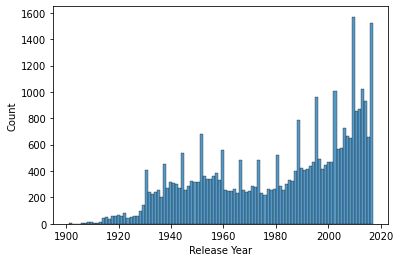

In [ ]:
sns.histplot(data, x='Release Year', bins=100)

## Origin/Ethnicity

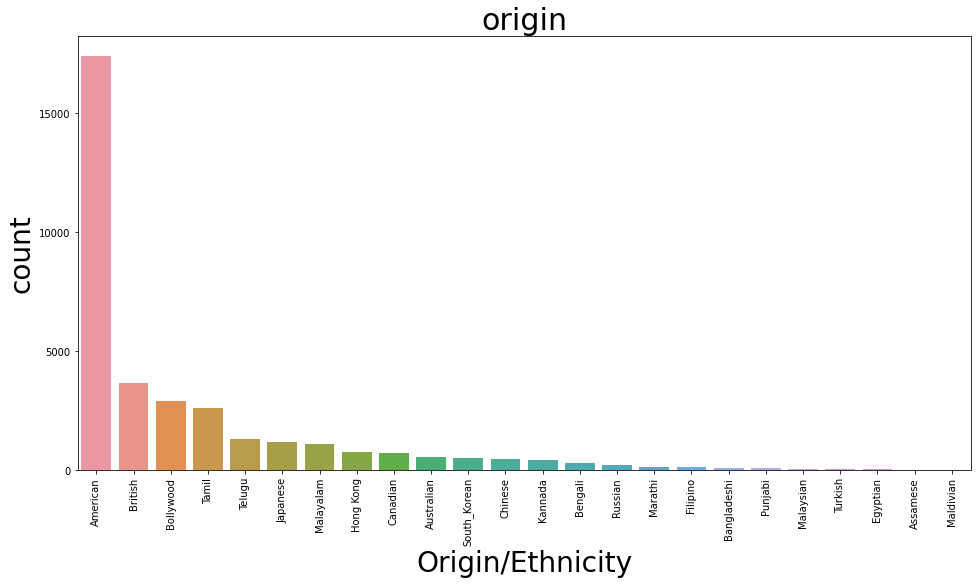

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.xlabel('Origin/Ethnicity', fontsize=28)
plt.ylabel('Counts', fontsize=28)
ax = sns.countplot(data['Origin/Ethnicity'], order=pd.value_counts(data['Origin/Ethnicity']).index)
ax.set_title('origin', fontsize=30)
plt.rc('font', size=30)
plt.xticks(rotation=90)
pass

# Корректировка данных
Теперь приступим к корректировке данных

Для начала заменим табуляцию, перенос строки не разрывный пробел на пробелы

In [ ]:
data['Title'] = data['Title'].apply(specSymbolsToSpace)
data['Director'] = data['Director'].apply(specSymbolsToSpace)
data['Cast'] = data['Cast'].apply(specSymbolsToSpace)
data['Genre'] = data['Genre'].apply(specSymbolsToSpace)
data['Plot'] = data['Plot'].apply(specSymbolsToSpace)
data['DirectorCorrected'] = data['DirectorCorrected'].apply(specSymbolsToSpace)
data['CastCorrected'] = data['CastCorrected'].apply(specSymbolsToSpace)
data['GenreCorrected'] = data['GenreCorrected'].apply(specSymbolsToSpace)

## Correction Wiki
Начнем с ссылок на википедию.

1) исследуем данные

In [ ]:
def getRepeats(df:pd.DataFrame, column):
    col = df[column]
    return data.loc[list(col[col.duplicated(False)].index)]

In [ ]:
dataRepeatsWikis = getRepeats(data, 'Wiki Page')
dataRepeatsWikis.sort_values('Wiki Page').head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
17813,2009,$9.99,Australian,Tatia Rosenthal,Geoffrey Rush Joel Edgerton Anthony LaPaglia C...,animation drama,https://en.wikipedia.org/wiki/$9.99,The film mainly focuses on 28-year-old Dave Pe...,tatia rosenthal,geoffrey rush joel edgerton anthony lapaglia c...,animation drama
17796,2008,$9.99,Australian,Tatia Rosenthal,"Geoffrey Rush, Joel Edgerton, Samuel Johnson",animation,https://en.wikipedia.org/wiki/$9.99,The film mainly focuses on 28-year-old Dave Pe...,tatia rosenthal,"geoffrey rush, joel edgerton, samuel johnson",animation
21611,2016,100 Streets,British,Director: Jim O'Hanlon,"Director: Jim O'Hanlon Cast: Idris Elba, Gemma...",unknown,https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,director: jim o'hanlon,"director: jim o'hanlon cast: idris elba, gemma...",unknown
17168,2017,100 Streets,American,Jim O'Hanlon,Jim O'Hanlon (director); Leon F. Butler (scree...,drama,https://en.wikipedia.org/wiki/100_Streets,The film centers on three characters who have ...,jim o'hanlon,jim o'hanlon (director); leon f. butler (scree...,drama
32126,2002,123,Telugu,K. Subhaash,"Prabhu Deva, Jyothika, Raju Sundaram, Nagendra...",comedy,https://en.wikipedia.org/wiki/123_(film),"Tirupathi (Prabhu Deva), Pazhani (Raju Sundara...",k. subhaash,"prabhu deva, jyothika, raju sundaram, nagendra...",comedy


Inspiration:
давайте обратим вниание например на индексы 21611 и 17168 (https://en.wikipedia.org/wiki/100_Streets) у одного указан Genre, у второго стоит unknown. Можно предроложить, что этот фильм или серия фильмов выходят одного и того же жанра. Редко бывает, что следующая часть фильма имеет жанр существенно отличный от предыдущего.

32484 и 31074 (https://en.wikipedia.org/wiki/180_(2011_Tamil_film)) фильм имеет одинаковую ссылку на вики и если перейти по ней, то будет понятно, что это один и тот же фильм

33517 33545 33546 (https://en.wikipedia.org/wiki/20th_Century_Boys#Films) - в отличие от предыдущих случаев - это трилогия фильмов, а не один и тот же фильм с задублированными названиями

17952 и 17271 (https://en.wikipedia.org/wiki/2:22_(2017_film)) -  один и тот же фильм, но с разными жанрами


Надо понять, как именно бралось описание Plot. У меня есть предположение, что Plot просто дергался с Wiki page и записывался. Если это так и описания фильмов ничем не отличаются, то можно оставлять любое

In [ ]:
dataRepeatsWikis.groupby('Wiki Page').nunique().sort_values('Plot', ascending=False).head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected
Wiki Page,,,,,,,,,,
https://en.wikipedia.org/wiki/Nanny_McPhee,1,1,2,1,2,2,2,1,2,2
https://en.wikipedia.org/wiki/$9.99,2,1,1,1,2,2,1,1,2,2
https://en.wikipedia.org/wiki/Rakshasa_Rajavu,2,1,1,2,2,1,1,2,2,1
https://en.wikipedia.org/wiki/Ram_Lakshman,2,1,2,2,2,2,1,2,2,2
https://en.wikipedia.org/wiki/Ramakrishna_(film),2,2,2,2,2,2,1,2,2,2


Все Wiki Page кроме одной имеют после группировки уникальных значений в столбце Plot = 1. Осталось отдельно обработать https://en.wikipedia.org/wiki/Nanny_McPhee. Для этой страницы объединим данные через '. '

todo: отдельно обрабоать https://en.wikipedia.org/wiki/Nanny_McPhee

2) наметим план работы

Можно предложить следующее решение дублирования ссылок:
фильмы могут быть многосерийными и одним и тем же фильмом с уточнениями (жанров, актеров, директора). Можно слепить фильмы, имеющими одну и ту же ссылку на вики страницу по следующему принципу:

1) год выпуска фильма берется наименьший, в случае если это серия фильмов или по каким-то причинам один и тот же фильм имеет разные года выпусков это значит, что он вышел в прокат в разных странах в разные года и корректнее брать наименьшую дату

2) Title идет конкатенацией через разделитель '|', мы знаем что Title не может быть пропущен. Это надо на случай различного называния фильма в разных странах

3) Origin/Ehicaly объединяем черех ',' после чего удаляем повторения

4) Director идет конкатенацией через ',', после чего удаляются повторения, это позволит исключить одних и тех же людей, и оставить случаи когда над серией фильмов работали разные люди, кроме того удастся уточнить часть значений 'Unknown'

5) Cast идет конкатенацией через ',' с удаление повторений. Такой подход позволит уточнить часть значений 'unknown'.

6) Genre идет конкатенацией через ',' с удаление повторяющихся значений. Так же по возможности уточняем 'unknown'.

7) Берется одна wiki page

8) Plot берем любое кроме https://en.wikipedia.org/wiki/Nanny_McPhee, для нее объединяем через '. '

3) Препроцессинг Wiki Page

In [ ]:
def removeDuplicatesFromRepeats(df:pd.DataFrame, column):
    return df.groupby(column).agg({
        'Release Year': lambda x: min(x),  #+
        'Title': lambda x: ','.join(x),  # удалить повторения
        'Origin/Ethnicity': lambda x: ','.join(x),  # удалить повторения
        'Director': lambda x: ','.join(x),  # удалить повторения
        'Cast': lambda x: ','.join(x),  #удалить повторения
        'Genre': lambda x: ','.join(x),  #удалить повторения
        'Plot': lambda x: min(x),  #+по сути берем любой
        'DirectorCorrected': lambda x: ','.join(x),
        'CastCorrected': lambda x: ','.join(x),
        'GenreCorrected': lambda x: ','.join(x)
    })

In [ ]:
dataRepeatsWikis = removeDuplicatesFromRepeats(dataRepeatsWikis, 'Wiki Page')
dataRepeatsWikis.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected
Wiki Page,,,,,,,,,,
https://en.wikipedia.org/wiki/$9.99,2008,"$9.99,$9.99","Australian,Australian","Tatia Rosenthal,Tatia Rosenthal","Geoffrey Rush, Joel Edgerton, Samuel Johnson,G...","animation,animation drama",The film mainly focuses on 28-year-old Dave Pe...,"tatia rosenthal,tatia rosenthal","geoffrey rush, joel edgerton, samuel johnson,g...","animation,animation drama"
https://en.wikipedia.org/wiki/100_Streets,2016,"100 Streets,100 Streets","American,British","Jim O'Hanlon,Director: Jim O'Hanlon",Jim O'Hanlon (director); Leon F. Butler (scree...,"drama,unknown",The film centers on three characters who have ...,"jim o'hanlon,director: jim o'hanlon",jim o'hanlon (director); leon f. butler (scree...,"drama,unknown"
https://en.wikipedia.org/wiki/123_(film),2002,"123,123,123","Kannada,Tamil,Telugu","K. Subhash,K. Subash,K. Subhaash","Prabhu Deva, Raju Sundaram, Jyothika, Nagendra...","unknown,unknown,comedy","Tirupathi (Prabhu Deva), Pazhani (Raju Sundara...","k. subhash,k. subash,k. subhaash","prabhu deva, raju sundaram, jyothika, nagendra...","unknown,unknown,comedy"
https://en.wikipedia.org/wiki/12_Years_a_Slave_(film),2013,"12 Years a Slave,12 Years a Slave","American,British","Steve McQueen,Director: Steve McQueen","Chiwetel Ejiofor, Michael Fassbender, Benedict...","drama,unknown","In 1841, Solomon Northup is a free African-Ame...","steve mcqueen,director: steve mcqueen","chiwetel ejiofor, michael fassbender, benedict...","drama,unknown"
https://en.wikipedia.org/wiki/14_Blades,2010,"14 Blades,14 Blades","Chinese,Hong Kong","Daniel Lee Yan-Kong,Daniel Lee","Donnie Yen, Zhao Wei,Donnie Yen, Zhao Wei","historical/action,martial arts","During the late Ming Dynasty, the imperial cou...","daniel lee yan-kong,daniel lee","donnie yen, zhao wei,donnie yen, zhao wei","historical/action,martial arts"


In [ ]:
def removeLinkFromColumn(df: pd.DataFrame, column):
    df[column] = df.index.copy()
    df.reset_index(drop=True, inplace=True)
    return df

In [ ]:
dataRepeatsWikis = removeLinkFromColumn(dataRepeatsWikis, 'Wiki Page')
dataRepeatsWikis.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected,Wiki Page
0,2008,"$9.99,$9.99","Australian,Australian","Tatia Rosenthal,Tatia Rosenthal","Geoffrey Rush, Joel Edgerton, Samuel Johnson,G...","animation,animation drama",The film mainly focuses on 28-year-old Dave Pe...,"tatia rosenthal,tatia rosenthal","geoffrey rush, joel edgerton, samuel johnson,g...","animation,animation drama",https://en.wikipedia.org/wiki/$9.99
1,2016,"100 Streets,100 Streets","American,British","Jim O'Hanlon,Director: Jim O'Hanlon",Jim O'Hanlon (director); Leon F. Butler (scree...,"drama,unknown",The film centers on three characters who have ...,"jim o'hanlon,director: jim o'hanlon",jim o'hanlon (director); leon f. butler (scree...,"drama,unknown",https://en.wikipedia.org/wiki/100_Streets
2,2002,"123,123,123","Kannada,Tamil,Telugu","K. Subhash,K. Subash,K. Subhaash","Prabhu Deva, Raju Sundaram, Jyothika, Nagendra...","unknown,unknown,comedy","Tirupathi (Prabhu Deva), Pazhani (Raju Sundara...","k. subhash,k. subash,k. subhaash","prabhu deva, raju sundaram, jyothika, nagendra...","unknown,unknown,comedy",https://en.wikipedia.org/wiki/123_(film)
3,2013,"12 Years a Slave,12 Years a Slave","American,British","Steve McQueen,Director: Steve McQueen","Chiwetel Ejiofor, Michael Fassbender, Benedict...","drama,unknown","In 1841, Solomon Northup is a free African-Ame...","steve mcqueen,director: steve mcqueen","chiwetel ejiofor, michael fassbender, benedict...","drama,unknown",https://en.wikipedia.org/wiki/12_Years_a_Slave...
4,2010,"14 Blades,14 Blades","Chinese,Hong Kong","Daniel Lee Yan-Kong,Daniel Lee","Donnie Yen, Zhao Wei,Donnie Yen, Zhao Wei","historical/action,martial arts","During the late Ming Dynasty, the imperial cou...","daniel lee yan-kong,daniel lee","donnie yen, zhao wei,donnie yen, zhao wei","historical/action,martial arts",https://en.wikipedia.org/wiki/14_Blades


4) Теперь удалим повторения

In [ ]:
def removeDuplicates(df :pd.DataFrame):
    df['Title'] = df['Title'].apply(correctWithoutSor, separator=',')
    df['Origin/Ethnicity'] = df['Origin/Ethnicity'].apply(correctWithoutSor, separator=',')
    df['Director'] = df['Director'].apply(correctWithoutSor, separator=',')
    df['Cast'] = df['Cast'].apply(correctWithoutSor, separator=',')
    df['Genre'] = df['Genre'].apply(correctWithoutSor, separator=',')
    df['DirectorCorrected'] = df['DirectorCorrected'].apply(correctWithoutSor, separator=',')
    df['CastCorrected'] = df['CastCorrected'].apply(correctWithoutSor, separator=',')
    df['GenreCorrected'] = df['GenreCorrected'].apply(correctWithoutSor, separator=',')
    return df

In [ ]:
dataRepeatsWikis = removeDuplicates(dataRepeatsWikis)

5) Обновление dataframe

In [ ]:
def updateDataFrame(_data:pd.DataFrame, repeatsDf:pd.DataFrame, column):
    #удаляем индексы, соответсвующие повторяющимся элементам
    _data = _data.drop(index=_data[column][_data[column].duplicated(False)].index)
    #добавляем откорректированные записи
    _data = _data.append(repeatsDf, ignore_index=True)
    _data = _data.reset_index()
    _data = _data.drop(columns='index')
    return _data

In [ ]:
data = updateDataFrame(data, dataRepeatsWikis, 'Wiki Page')

## Correction Title

In [ ]:
#составим датафрейм с повторяющимися названиями
title = data['Title']
data.loc[list(title[title.duplicated(False)].index)].sort_values('Title').head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
32639,2014,10,Russian,Unknown,The Adventurers,unknown,https://en.wikipedia.org/wiki/The_Adventurers_...,Katya and Andrey arrive in Malta on the eve of...,unknown,the adventurers,unknown
9425,1979,10,American,Blake Edwards,"Dudley Moore, Julie Andrews, Bo Derek, Robert ...",unknown,https://en.wikipedia.org/wiki/10_(film),During a surprise 42nd birthday party for weal...,blake edwards,"dudley moore, julie andrews, bo derek, robert ...",unknown
23266,2012,100% Love,Bengali,Rabi Kinagi,"Jeet, Koel Mallick, Supriya Dutta",romance,https://en.wikipedia.org/wiki/100%25_Love_(201...,Rahul (Jeet) is from a middle-class family. He...,rabi kinagi,"jeet, koel mallick, supriya dutta",romance
31054,2011,100% Love,Telugu,Sukumar,"Naga Chaitanya, Tamannaah Bhatia, Tara Alisha",romance,https://en.wikipedia.org/wiki/100%25_Love_(201...,Balu (Naga Chaitanya) is always the top ranker...,sukumar,"naga chaitanya, tamannaah bhatia, tara alisha",romance
32545,2007,12,Russian,Nikita Mikhalkov,unknown,crime,https://en.wikipedia.org/wiki/12_(2007_film),The jury decides whether a young Chechen boy i...,nikita mikhalkov,unknown,crime


Inspiration:
не имеет смысла отдельно обрабатывать схожие названия, по большому счету все фильмы являются уникальными, тк их описания различные.

Но можно обратить внимание на индексы 4769 и 4541. Они имеют схожее описание, более того вики одной редиректит на другую, но их жанры разлины.
130 17129 5955 - различные экранизации книги. Имеют различное описания и жанры
Решение: смотрим по описанию, если оно совпадает, то тогда объединяем две записи в одну.

Такой подход позволит очистить данные от редиректов.


## Correction Plot

1) данные

In [ ]:
dataRepeatsPlot = getRepeats(data, 'Plot')
dataRepeatsPlot.sort_values('Plot').head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
32186,2012,One Piece: Film Z,Japanese,Tatsuya Nagamine,"Mayumi Tanaka, Kazuya Nakai, Akemi Okamura",anime,https://en.wikipedia.org/wiki/One_Piece:_Film_Z,"""Black Arm"" Zephyr (黒腕のゼファー, Kokuwan no Zefā),...",tatsuya nagamine,"mayumi tanaka, kazuya nakai, akemi okamura",anime
32190,2013,One Piece Film: Z,Japanese,Tatsuya Nagamine,Mayumi Tanaka,unknown,https://en.wikipedia.org/wiki/One_Piece_Film:_Z,"""Black Arm"" Zephyr (黒腕のゼファー, Kokuwan no Zefā),...",tatsuya nagamine,mayumi tanaka,unknown
31836,2001,Kinnikuman Nisei the Movie,Japanese,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kinnikuman_Movie...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown
31858,2002,Kinnikuman Nisei: Muscle Carrot Competition! T...,Japanese,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kinnikuman_Movie...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown
31631,1985,Kinnikuman the Movie: Counterattack! The Under...,Japanese,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Counterattack!_T...,"(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...",unknown,unknown,unknown


2) план

Действуем аналогично Wiki Page

если описание двух фильмов совпадает при разнице в сылках, значит что одна из ссылок ведет на другую. решение:

1) год выпуска фильма берется наименьший, в случае если это серия фильмов или по каким-то причинам один и тот же фильм имеет разные года выпусков это значит, что он релизнулся в разных странах в разные года и корректнее брать наименьшую дату

2) Title идет конкатенацией через разделитель '|', мы знаем что Title не может быть пропущен, удалить повторы

3) Origin/Ehicaly объединяем черех ',' после чего удаляем повторения

4) Director идет конкатенацией через ',', после чего удаляются повторенения, это позволит исключить одних и тех же людей, и оставить случаи когда над серией фильмов работали разные люди, кроме того удалятся часть значений Unkonwn

5) Cast идет конкатенацией через ',' с удаление повторений. Такой подход позволит избавится от части unknown

6) Genre идет конкатенацией через ',' с удаление повторяющихся значений

7) Берется одна wiki page

8) Plot берем любой

3) препроцессинг

In [ ]:
dataRepeatsPlot = removeDuplicatesFromRepeats(dataRepeatsPlot, 'Plot')
dataRepeatsPlot.head()

Release Year  \
Plot                                                               
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...          2012   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...          1985   
47 (Rupert Friend) is an "agent", a genetically...          2015   
A 14-year-old forlorn Kalyani delivers a boy in...          1991   
A drug bust is about to go down and Chicago cop...          1987   

                                                                                                Title  \
Plot                                                                                                    
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                One Piece: Film Z,One Piece Film: Z   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  Kinnikuman the Movie: Counterattack! The Under...   
47 (Rupert Friend) is an "agent", a genetically...                          Agent 47,Hitman: Agent 47   
A 14-year-old forlorn Kalyani delivers a boy in...                               Thalapathi,Dalapathi   
A drug bust is about to go down and Chicago cop...                              Rent-a-Cop,Rent-A-Cop   

                                                                                     Origin/Ethnicity  \
Plot                                                                                                    
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                                  Japanese,Japanese   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  Japanese,Japanese,Japanese,Japanese,Japanese,J...   
47 (Rupert Friend) is an "agent", a genetically...                                   American,British   
A 14-year-old forlorn Kalyani delivers a boy in...                                   Bollywood,Telugu   
A drug bust is about to go down and Chicago cop...                                  American,American   

                                                                                           Director  \
Plot                                                                                                  
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                Tatsuya Nagamine,Tatsuya Nagamine   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  Unknown,Unknown,Unknown,Unknown,Unknown,Unknown   
47 (Rupert Friend) is an "agent", a genetically...        Aleksander Bach,Director: Aleksander Bach   
A 14-year-old forlorn Kalyani delivers a boy in...                          Mani Ratnam,Mani Ratnam   
A drug bust is about to go down and Chicago cop...                        Jerry London,Jerry London   

                                                                                                 Cast  \
Plot                                                                                                    
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...  Mayumi Tanaka, Kazuya Nakai, Akemi Okamura,May...   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...    unknown,unknown,unknown,unknown,unknown,unknown   
47 (Rupert Friend) is an "agent", a genetically...  Rupert Friend Zachary Quinto Hannah Ware Thoma...   
A 14-year-old forlorn Kalyani delivers a boy in...  Rajinikanth, Mammootty, Shobana,Rajinikanth, M...   
A drug bust is about to go down and Chicago cop...  Burt Reynolds, Liza Minnelli, James Remar,Burt...   

                                                                                              Genre  \
Plot                                                                                                  
"Black Arm" Zephyr (黒腕のゼファー, Kokuwan no Zefā), ...                                    anime,unknown   
(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chouj...  unknown,unknown,unknown,unknown,unknown,unknown   
47 (Rupert Friend) is an "agent", a genetically...                                   action,unknown   
A 14-year-old forlorn Kalyani delivers a boy in...                             crime, drama,unknown   
A drug bust is about to go 

In [ ]:
dataRepeatsPlot = removeLinkFromColumn(dataRepeatsPlot, 'Plot')
dataRepeatsPlot.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,2012,"One Piece: Film Z,One Piece Film: Z","Japanese,Japanese","Tatsuya Nagamine,Tatsuya Nagamine","Mayumi Tanaka, Kazuya Nakai, Akemi Okamura,May...","anime,unknown","""Black Arm"" Zephyr (黒腕のゼファー, Kokuwan no Zefā),...","tatsuya nagamine,tatsuya nagamine","mayumi tanaka, kazuya nakai, akemi okamura,may...","anime,unknown"
1,1985,Kinnikuman the Movie: Counterattack! The Under...,"Japanese,Japanese,Japanese,Japanese,Japanese,J...","Unknown,Unknown,Unknown,Unknown,Unknown,Unknown","unknown,unknown,unknown,unknown,unknown,unknown","unknown,unknown,unknown,unknown,unknown,unknown","(マッスル人参争奪！超人大戦争, Massuru Ninjin Soudatsu! Chou...","unknown,unknown,unknown,unknown,unknown,unknown","unknown,unknown,unknown,unknown,unknown,unknown","unknown,unknown,unknown,unknown,unknown,unknown"
2,2015,"Agent 47,Hitman: Agent 47","American,British","Aleksander Bach,Director: Aleksander Bach",Rupert Friend Zachary Quinto Hannah Ware Thoma...,"action,unknown","47 (Rupert Friend) is an ""agent"", a geneticall...","aleksander bach,director: aleksander bach",rupert friend zachary quinto hannah ware thoma...,"action,unknown"
3,1991,"Thalapathi,Dalapathi","Bollywood,Telugu","Mani Ratnam,Mani Ratnam","Rajinikanth, Mammootty, Shobana,Rajinikanth, M...","crime, drama,unknown",A 14-year-old forlorn Kalyani delivers a boy i...,"mani ratnam,mani ratnam","rajinikanth, mammootty, shobana,rajinikanth, m...","crime, drama,unknown"
4,1987,"Rent-a-Cop,Rent-A-Cop","American,American","Jerry London,Jerry London","Burt Reynolds, Liza Minnelli, James Remar,Burt...","action,crime drama",A drug bust is about to go down and Chicago co...,"jerry london,jerry london","burt reynolds, liza minnelli, james remar,burt...","action,crime drama"


4) Удалим повторения

In [ ]:
dataRepeatsPlot = removeDuplicates(dataRepeatsPlot)

5) Объединение данных

In [ ]:
data = updateDataFrame(data, dataRepeatsPlot, 'Plot')

## People correction

### Correction Genre + Cast, Director
Теперь необходимо как-то стандартизировать наши жанры

#### Часть 0.
Вступление

In [ ]:
data.shape

(33868, 11)

In [ ]:
assert data.shape == (33868, 11)

In [ ]:
data.head(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,unknown,unknown
1,1901,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,unknown,unknown
2,1901,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,unknown,unknown
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,unknown,unknown
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter",unknown,unknown
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab...",cecil hepworth,may clark,unknown
6,1903,The Great Train Robbery,American,Edwin S. Porter,unknown,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...,edwin s. porter,unknown,western
7,1904,The Suburbanite,American,Wallace McCutcheon,unknown,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...,wallace mccutcheon,unknown,comedy
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...,edwin stanton porter,unknown,unknown
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....,edwin stanton porter,unknown,unknown


In [ ]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [ ]:
pd.Series(data['GenreCorrected'].unique()).head()

0                       unknown
1                       western
2                        comedy
3                         short
4    short action/crime western
dtype: object

наши жанры содержат в себе всякий мусор
* drama based on the play by bernard slade
* animated short co-produced with the national film board
и т.д.

In [ ]:
data.loc[2280]

Release Year                                                      1937
Title                                             Think Fast, Mr. Moto
Origin/Ethnicity                                              American
Director                                                 Norman Foster
Cast                          Peter Lorre, Virginia Field, Thomas Beck
Genre                                                   drama, mystery
Wiki Page            https://en.wikipedia.org/wiki/Think_Fast,_Mr._...
Plot                 The film opens with Mr. Moto in disguise as a ...
DirectorCorrected                                        norman foster
CastCorrected                 peter lorre, virginia field, thomas beck
GenreCorrected                                          drama, mystery
Name: 2280, dtype: object

Inspiration: как-то актеры попали в жанр, надо их от туда вытащить (например uday kiran)
Идея: genre и cast, бежим по всем записям, если cast.contains(element from genre) выпихиваем элемент, выводим элемент. (например на случай существования актера, который имеет фамилию romantic).
На всякий случай сделаем то же самое и для директора

Для начала доработаем с жанрами, так мы сможем определить список различных написаний одного и того же жанра (например sci-fi, scifi и science fiction). Потом проработаем моменты с Cast и Director.

#### Часть 1.
Для начала работаем с людьми, которые попали в жанр и в Актеров/Режиссеров

In [ ]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [ ]:
data.loc[27353]

Release Year                                                      2010
Title                                         Yogesh Dattatraya Gosavi
Origin/Ethnicity                                               Marathi
Director             Sandeep Kulkarni, Kishor Kadam, Neelam Shirke,...
Cast                                                             Drama
Genre                yogesh dattatraya gosavi's directorial debut. [9]
Wiki Page            https://en.wikipedia.org/wiki/Pratisaad_-_The_...
Plot                 Dr. Aditya (Sandeep Kulkarni), a leading homeo...
DirectorCorrected    sandeep kulkarni, kishor kadam, neelam shirke,...
CastCorrected                                                    drama
GenreCorrected       yogesh dattatraya gosavi's directorial debut. [9]
Name: 27353, dtype: object

Inspiration:
cast перепутан с genre

определим список актеров и продюссеров, которые попали и в соответсвующие им колонки и в жанр. Возможно, это упростит дальнейшую жизнь

In [ ]:
def find_unique(row, separator: str):
    """
    Возвращаем уникальные записи, разделенные сепаратором + стрипим их
    @return ret = set
    """
    ret = str(row).split(separator)
    for i in range(len(ret)):
        ret[i] = ret[i].strip()
    ret = set(ret)
    ret.discard('')
    return ret

In [ ]:
directors_set = set()
casts_set = set()
genres_set = set()
for index, row in data.iterrows():
    directors = row['DirectorCorrected'].replace('/', ',').replace('-', ',')
    directors_set.update(find_unique(directors, ','))

    casts = row['CastCorrected'].replace('/', ',').replace('-', ',')
    casts_set.update(find_unique(casts, ','))

    genres = row['GenreCorrected'].replace('/', ',').replace('-', ',')
    genres_set.update(find_unique(genres, ','))

In [ ]:
suspicious_genres_not_pair = set()
for genre in genres_set:
    if genre != 'unknown':  #toto актуальна ли проверка?
        if genre in directors_set:
            suspicious_genres_not_pair.add(genre)
        if genre in casts_set:
            suspicious_genres_not_pair.add(genre)
print(len(suspicious_genres_not_pair))

118


In [ ]:
suspicious_genres = set()
for genre in genres_set:
    if genre != 'unknown':  #toto актуальна ли проверка?
        if genre in directors_set:
            suspicious_genres.add((genre, 'd'))
        if genre in casts_set:
            suspicious_genres.add((genre, 'c'))
print(len(suspicious_genres))

137


Всего есть 116 записей, которые попали и в Cast/Director и в жанр. Стоит просмотреть список и удалить существующие жанры, которые попали к актерам.
todo: до улучшения было 116! актеров

In [ ]:
genre_list = [
    'action',
    'animated',
    'comedy',
    'crime',
    'cult',
    'drama',
    'erotic thriller',
    'family',
    'musical',
    'mystery',
    'fantasy',
    'heist',
    'historical',
    'history',
    'horror',
    'love',
    'romantic comedy',
    'romantic fantasy',
    'social',
    'sports',
    'thriller',
    'war',
    'romance',
    'suspense'  #thriller
]
len(genre_list)

24

обновили/сократили варианты подозрительных жанров, можно будет их выносить в имена актеров/режиссеров соответсвенно

In [ ]:
suspicious_genres_not_pair = suspicious_genres_not_pair - set(genre_list)
len(suspicious_genres_not_pair)

94

94 жанров на самом деле содержат имена актеров и/или режисеров

Убираем жанры, содержаие в себе режисера и/или актеров

In [ ]:
for index, row in data.iterrows():

    genres = row['Genre'].replace('/', ',').replace('-', ',')
    genres = find_unique(genres, ',')

    len_genres = len(genres)
    diff = genres.difference(suspicious_genres_not_pair)
    len_diff = len(diff)

    # те произошли изменения
    if len_genres != len_diff:
        for s_genre in suspicious_genres:
            if s_genre[0] in genres:
                if s_genre[1] == 'c':
                    row['CastCorrected'] = row['CastCorrected'] + ',' + s_genre[0]
                if s_genre[1] == 'd':
                    row['DirectorCorrected'] = row['DirectorCorrected'] + ',' + s_genre[0]
                genres = genres - suspicious_genres_not_pair
                row['GenreCorrected'] = ','.join(genres)

        data.iloc[index] = row

теперь откорректируем названия полей

In [ ]:
def regex(line:str):
    """
    заменяем различные символы на ','
    :param line:
    :return:
    """
    ret = re.sub(r" */ *", ",", line)
    ret = re.sub(r" *, *", ',', ret)
    return re.sub(r" .[-–] .", ",", ret)
data['GenreCorrected'] = data['GenreCorrected'].apply(regex)

#### Часть 2.
Теперь работаем с людьми, которые попали только в жанр

In [ ]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [ ]:
data_copy = data.copy()

In [ ]:
data = data_copy.copy()

In [ ]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [ ]:
data.iloc[30106]

Release Year                                                      1975
Title                                              Dasari Narayana Rao
Origin/Ethnicity                                                Telugu
Director                                          Sobhan Babu, Sharada
Cast                                                             Drama
Genre                                         chakravarthy musical hit
Wiki Page                    https://en.wikipedia.org/wiki/Balipeetham
Plot                 Bhaskar (Shobhan Babu), a Dalit marries Aruna ...
DirectorCorrected                                 sobhan babu, sharada
CastCorrected                                                    drama
GenreCorrected                                chakravarthy musical hit
Name: 30106, dtype: object

In [ ]:
import string 

In [ ]:
# чтобы слегка уменьшить код я вынес актеров, которые не встречаются среди актеров и жанров в отдельный .txt файл.
actors_txt = set()
with open("/content/actors.txt") as file:
    for line in file:
        actors_txt.add(line.replace('\n', '').strip())

In [ ]:
%%time
for index, row in data[:10].iterrows():
    genresCorrected = ' ' + str(row['GenreCorrected']) + ' '
    for punct in string.punctuation:
        genresCorrected = genresCorrected.replace(punct, ' ')

    for actor_txt in actors_txt:
        if genresCorrected.__contains__(' ' + actor_txt + ' '):
            print(genresCorrected, actor_txt)
            row['CastCorrected'] = row['CastCorrected'] + ',' + actor_txt
            genresCorrected = re.sub(r" *" + actor_txt + " *", ' ', genresCorrected)
            row['GenreCorrected'] = genresCorrected
            data.iloc[index] = row

CPU times: user 1.69 ms, sys: 2 µs, total: 1.7 ms
Wall time: 1.71 ms


In [ ]:
data.iloc[7:10]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
7,1904,The Suburbanite,American,Wallace McCutcheon,unknown,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...,wallace mccutcheon,unknown,comedy
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...,edwin stanton porter,unknown,unknown
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,unknown,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....,edwin stanton porter,unknown,unknown


#### Часть 3.
Очищаем от оставшегося мусора + стандартизируем жанры

In [ ]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

Для этого прибегнем ку следующему трюку:
создадим два направденных графа без циклов. 
В первом жарны переходят в жанры без пробелов
Второй содержит более сложные конструкции

Затем для каждой строки будем смотреть сложные конструкции и спличенную по пробелам, все полученные жанры - новые жанры

In [ ]:
data.loc[7]

Release Year                                                      1904
Title                                                  The Suburbanite
Origin/Ethnicity                                              American
Director                                            Wallace McCutcheon
Cast                                                           unknown
Genre                                                           comedy
Wiki Page                https://en.wikipedia.org/wiki/The_Suburbanite
Plot                 The film is about a family who move to the sub...
DirectorCorrected                                   wallace mccutcheon
CastCorrected                                                  unknown
GenreCorrected                                                  comedy
Name: 7, dtype: object

In [ ]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [ ]:
# for graphviz
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pygraphviz as pgv
from pygraphviz import *

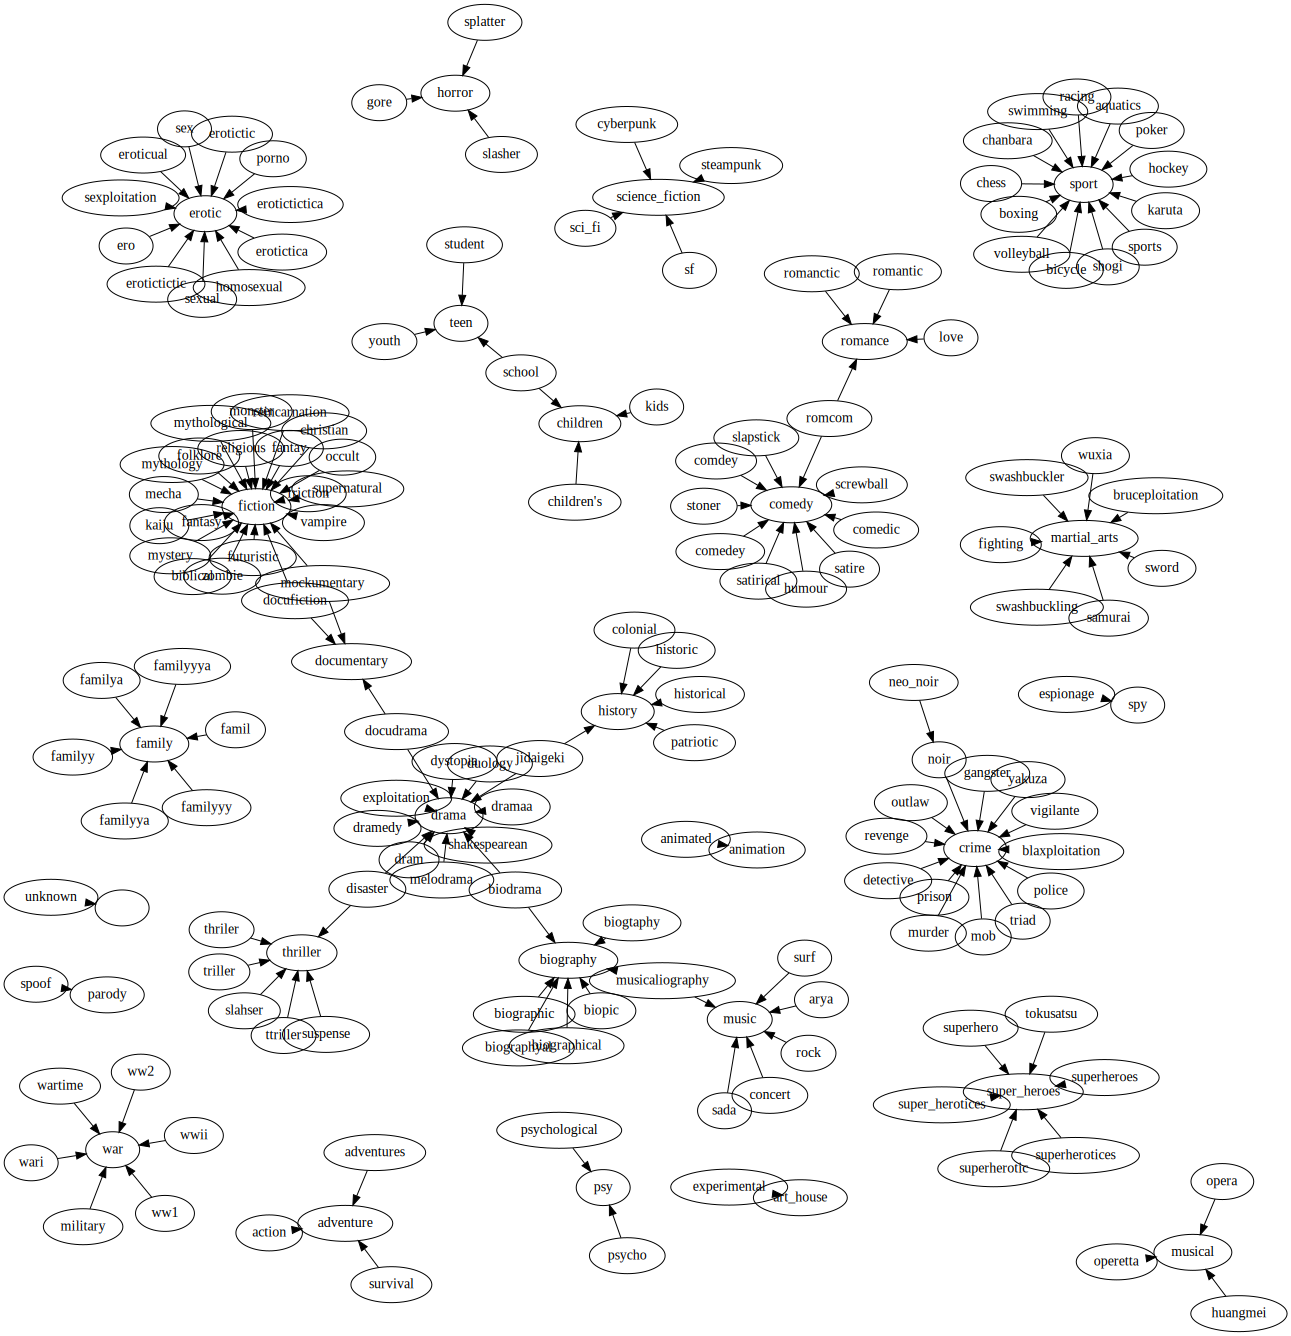

In [ ]:
G_simple = pgv.AGraph(strict=True, directed=True)
G_simple.add_edges_from(
    [('unknown', ' '),

     ('action', 'adventure'),

     ('survival', 'adventure'),
     ('adventures', 'adventure'),

     ('animated', 'animation'),

     ('experimental', 'art_house'),

     ('biographical', 'biography'),
     ('biopic', 'biography'),

     ('biographic', 'biography'),
     ('biogtaphy', 'biography'),
     ('biographyal', 'biography'),
     ('biodrama', 'biography'),
     ('biodrama', 'biography'),
     ('musicaliography', 'biography'),

     ("children's", 'children'),
     ('kids', 'children'),
     ('school', 'children'),

     ('stoner', 'comedy'),
     ('humour', 'comedy'),
     ('slapstick', 'comedy'),
     ('screwball', 'comedy'),
     ('comdey', 'comedy'),
     ('comedey', 'comedy'),
     ('comedic', 'comedy'),
     ('satirical', 'comedy'),
     ('satire', 'comedy'),
     ('romcom', 'comedy'),

     ('detective', 'crime'),
     ('noir', 'crime'),
     ('gangster', 'crime'),
     ('yakuza', 'crime'),
     ('outlaw', 'crime'),
     ('murder', 'crime'),
     ('police', 'crime'),
     ('prison', 'crime'),

     ('triad', 'crime'),
     ('yakuza', 'crime'),
     ('mob', 'crime'),
     ('revenge', 'crime'),
     ('blaxploitation', 'crime'),
     ('vigilante', 'crime'),

     ('docudrama', 'documentary'),
     ('mockumentary', 'documentary'),
     ('docufiction', 'documentary'),

     ('melodrama', 'drama'),
     ('shakespearean', 'drama'),
     ('exploitation', 'drama'),
     ('dramedy', 'drama'),
     ('jidaigeki', 'drama'),
     ('biodrama', 'drama'),
     ('jidaigeki', 'drama'),
     ('dram', 'drama'),
     ('dramaa', 'drama'),
     ('duology', 'drama'),
     ('docudrama', 'drama'),

     ('dramedy', 'drama'),
     ('dystopia', 'drama'),

     ('disaster', 'drama'),

     ('sexploitation', 'erotic'),
     ('sexual', 'erotic'),
     ('sex', 'erotic'),
     ('sexual', 'erotic'),
     ('porno', 'erotic'),
     ('erotictic', 'erotic'),
     ('erotictictic', 'erotic'),
     ('erotictictica', 'erotic'),
     ('sexual', 'erotic'),
     ('ero', 'erotic'),
     ('erotictica', 'erotic'),
     ('sexual', 'erotic'),
     ('homosexual', 'erotic'),
     ('sexual', 'erotic'),
     ('erotictic', 'erotic'),
     ('eroticual', 'erotic'),
     ('sexual', 'erotic'),
     ('homosexual', 'erotic'),
     ('sexploitation', 'erotic'),
     ('sexual', 'erotic'),

     ('familyy', 'family'),
     ('familyyy', 'family'),
     ('familyyya', 'family'),
     ('famil', 'family'),
     ('familya', 'family'),
     ('familyya', 'family'),

     ('fantasy', 'fiction'),
     ('zombie', 'fiction'),
     ('vampire', 'fiction'),

     ('fantay', 'fiction'),
     ('docufiction', 'fiction'),
     ('friction', 'fiction'),
     ('biblical', 'fiction'),
     ('mockumentary', 'fiction'),
     ('folklore', 'fiction'),
     ('christian', 'fiction'),

     ('futuristic', 'fiction'),
     ('religious', 'fiction'),
     ('reincarnation', 'fiction'),
     ('mecha', 'fiction'),
     ('kaiju', 'fiction'),
     ('monster', 'fiction'),
     ('mythological', 'fiction'),
     ('mythology', 'fiction'),
     ('occult', 'fiction'),
     ('supernatural', 'fiction'),

     ('mystery', 'fiction'),

     ('historical', 'history'),
     ('patriotic', 'history'),

     ('colonial', 'history'),

     ('historic', 'history'),

     ('jidaigeki', 'history'),
     ('jidaigeki', 'history'),

     ('gore', 'horror'),
     ('slasher', 'horror'),
     ('slasher', 'horror'),
     ('splatter', 'horror'),

     ('fighting', 'martial_arts'),

     ('samurai', 'martial_arts'),
     ('wuxia', 'martial_arts'),

     ('bruceploitation', 'martial_arts'),
     ('swashbuckler', 'martial_arts'),
     ('swashbuckling', 'martial_arts'),
     ('sword', 'martial_arts'),

     ('arya', 'music'),
     ('sada', 'music'),
     ('rock', 'music'),
     ('surf', 'music'),
     ('concert', 'music'),
     ('musicaliography', 'music'),

     ('operetta', 'musical'),
     ('huangmei', 'musical'),
     ('opera', 'musical'),

     ('neo_noir', 'noir'),

     ('spoof', 'parody'),

     ('psychological', 'psy'),
     ('psycho', 'psy'),

     ('love', 'romance'),

     ('romantic', 'romance'),

     ('romcom', 'romance'),

     ('romanctic', 'romance'),

     ('sci_fi', 'science_fiction'),

     ('sf', 'science_fiction'),

     ('cyberpunk', 'science_fiction'),
     ('steampunk', 'science_fiction'),

     ('chess', 'sport'),
     ('bicycle', 'sport'),
     ('racing', 'sport'),
     ('aquatics', 'sport'),
     ('swimming', 'sport'),
     ('volleyball', 'sport'),
     ('karuta', 'sport'),
     ('boxing', 'sport'),
     ('sports', 'sport'),
     ('shogi', 'sport'),
     ('chanbara', 'sport'),
     ('hockey', 'sport'),
     ('poker', 'sport'),

     ('espionage', 'spy'),

     ('super_herotices', 'super_heroes'),
     ('superherotices', 'super_heroes'),
     ('tokusatsu', 'super_heroes'),
     ('superheroes', 'super_heroes'),
     ('superhero', 'super_heroes'),

     ('superherotic', 'super_heroes'),
     ('superheroes', 'super_heroes'),

     ('student', 'teen'),
     ('school', 'teen'),
     ('youth', 'teen'),

     ('ttriller', 'thriller'),
     ('slahser', 'thriller'),
     ('thriler', 'thriller'),
     ('suspense', 'thriller'),

     ('suspense', 'thriller'),

     ('disaster', 'thriller'),
     ('triller', 'thriller'),
     ('suspense', 'thriller'),
     ('thriler', 'thriller'),

     ('wari', 'war'),
     ('ww1', 'war'),
     ('ww2', 'war'),
     ('wwii', 'war'),

     ('wartime', 'war'),
     ('military', 'war')])
G_simple.layout()
G_simple.draw('example.png', format='png')
G_simple

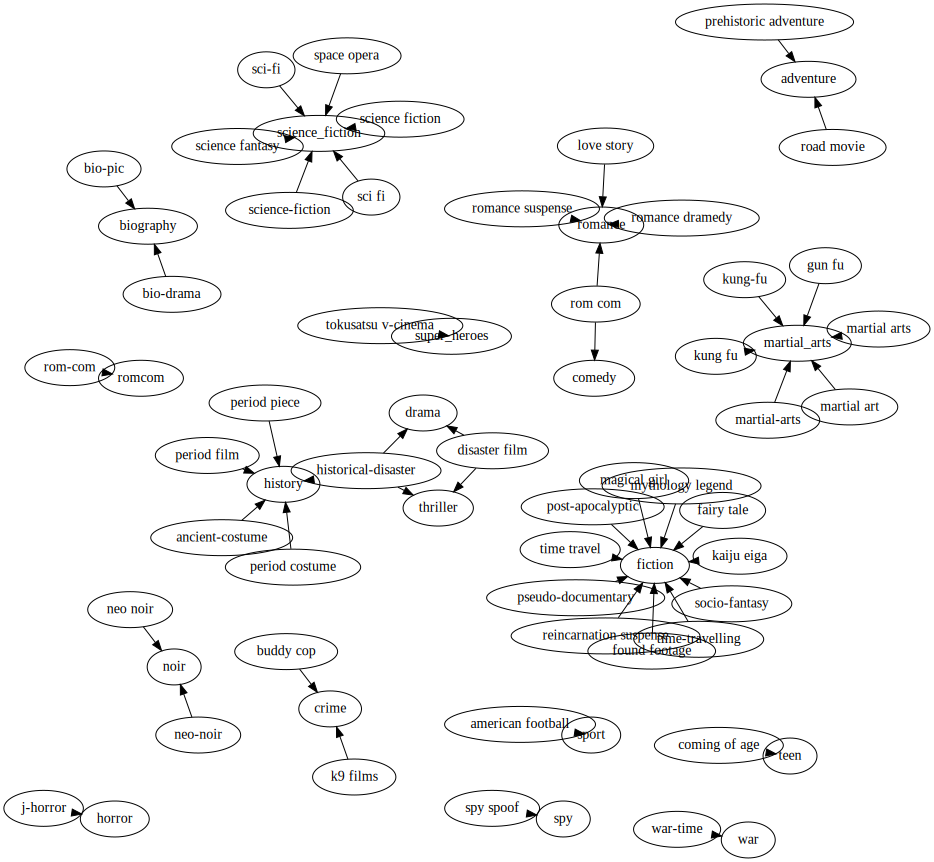

In [ ]:
G_complex = pgv.AGraph(strict=True, directed=True)
G_complex.add_edges_from([
    ('neo noir', 'noir'),
    ('period film', 'history'),
    ('period costume', 'history'),
    ('period piece', 'history'),
    ('kung fu', 'martial_arts'),
    ('martial art', 'martial_arts'),
    ('gun fu', 'martial_arts'),
    ('martial arts', 'martial_arts'),
    ('prehistoric adventure', 'adventure'),
    ('road movie', 'adventure'),
    ('buddy cop', 'crime'),
    ('disaster film', 'drama'),
    ('time travel', 'fiction'),
    ('found footage', 'fiction'),
    ('magical girl', 'fiction'),
    ('fairy tale', 'fiction'),
    ('mythology legend', 'fiction'),
    ('reincarnation suspense', 'fiction'),
    ('kaiju eiga', 'fiction'),
    ('tokusatsu v-cinema', 'super_heroes'),
    ('science fantasy', 'science_fiction'),
    ('sci fi', 'science_fiction'),
    ('american football', 'sport'),
    ('space opera', 'science_fiction'),
    ('rom com', 'romance'),
    ('rom com', 'comedy'),
    ('love story', 'romance'),
    ('romance dramedy', 'romance'),
    ('love story', 'romance'),
    ('romance suspense', 'romance'),
    ('science fiction', 'science_fiction'),
    ('spy spoof', 'spy'),
    ('coming of age', 'teen'),
    ('disaster film', 'thriller'),
    ('historical-disaster', 'thriller'),
    ('rom-com', 'romcom'),
    ('neo-noir', 'noir'),
    ('j-horror', 'horror'),
    ('historical-disaster', 'history'),
    ('pseudo-documentary', 'fiction'),
    ('socio-fantasy', 'fiction'),
    ('historical-disaster', 'drama'),
    ('bio-pic', 'biography'),
    ('time-travelling', 'fiction'),
    ('post-apocalyptic', 'fiction'),
    ('bio-drama', 'biography'),
    ('ancient-costume', 'history'),
    ('kung-fu', 'martial_arts'),
    ('martial-arts', 'martial_arts'),
    ('sci-fi', 'science_fiction'),
    ('war-time', 'war'),
    ('science-fiction', 'science_fiction'),
    ('k9 films', 'crime'),
])
G_complex.layout()
G_complex.draw('example.png', format='png')
G_complex

In [ ]:
def finder(G: pgv.AGraph, node):
    """
    Для графа G находим все листовые вершины для вершины node
    :Exception: -  если граф содержит циклы
    """
    ret = set()
    visitedEdges = set()
    succesors = G.successors(node)
    if len(succesors) == 0:
        ret.add(node)
        return ret
    for q in succesors:
        newSuccesors = G.successors(q)
        if len(newSuccesors) == 0:
            # Получили цикл
            ret.add(q)
        else:
            for n in newSuccesors:
                if G.get_edge(q, n) in visitedEdges:
                    raise Exception('Граф содержит циклы')
                succesors.append(n)
                visitedEdges.add(G.get_edge(q, n))
    return ret

найдем жанры для сложных графов

In [ ]:
# список всех не листьев
vertexes = set()
for node in G_complex.nodes():
    if len(G_complex.successors(node)) != 0:
        vertexes.add(str(node))

In [ ]:
newData = pd.DataFrame()
for index, row in data.iterrows():
    genreCorrected = row['GenreCorrected']
    res = set()
    for ver in vertexes:
        if genreCorrected.__contains__(ver):
            res.update(finder(G_complex, ver))

    row['GenreCorrected v2'] = ','.join(res)
    newData = newData.append(row, ignore_index=True)

In [ ]:
assert newData.loc[7]['GenreCorrected'] == 'comedy'

теперь найдем жанры для простых графов

In [ ]:
#список всех вершин графа
vertexes = set()
for node in G_simple.nodes():
    vertexes.add(str(node))

In [ ]:
newData1 = pd.DataFrame()
for index, row in newData.iterrows():
    genreCorrected = correctWithoutSor(str(row['GenreCorrected']).replace('-', ' ').replace('/', ' ').replace(',', ' ').replace('.', ' '), ' ').split(' ')
    res = set()
    for ver in vertexes:
        if ver in genreCorrected:
            res.update(finder(G_simple, ver))

    row['GenreCorrected v2'] = row['GenreCorrected v2'] + ','.join(res)
    newData1 = newData1.append(row, ignore_index=True)

In [ ]:
data = newData1.copy()
data['GenreCorrected'] = data['GenreCorrected v2'].copy()
data = data.drop(columns=['GenreCorrected v2'])

In [ ]:
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,unknown,
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,unknown,
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,unknown,
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,unknown,
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter",unknown,


In [ ]:
assert data.loc[7]['GenreCorrected'] == 'comedy'

In [ ]:
len(pd.Series(data['GenreCorrected'].unique()))

40

получили 22 различных комбинация жанров

In [ ]:
data.to_csv('movies_v2.csv')

### Очищаем Cast от жанров

In [ ]:
# список всех node деревьев
vertexes = set()
for node in G_complex.nodes():
    vertexes.add(str(node))
for node in G_simple.nodes():
    vertexes.add(str(node))

In [ ]:
# находим подозрительный список актеров
data1 = pd.DataFrame(columns=data.columns)

for index, row in data.iterrows():
    casts = set(correctWithoutSor(row['CastCorrected'], separator=',').split(','))
    castSuspicious = set()
    castTrue = set()

    for cast in casts:
        for genre in vertexes:
            if re.search('[^a-zA-Z]' + genre + '[^a-zA-Z]', ' ' + cast + ' '):
                castSuspicious.add(cast)

    if len(castSuspicious) > 0:
        row['CastSuspicious'] = ','.join(castSuspicious)
        row['castTrue'] = ','.join(casts - castSuspicious)
        data1 = data1.append(row)

print(data1.shape)
data1.head()

(1747, 13)


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected,CastSuspicious,castTrue
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,unknown,,unknown,
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,unknown,,unknown,
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,unknown,,unknown,
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,unknown,,unknown,
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter",unknown,,unknown,


In [ ]:
assert data1.loc[7]['GenreCorrected'] == 'comedy'

In [ ]:
data2 = pd.DataFrame(columns=data1.columns)
for index, row in data1.iterrows():
    casts = set(row['CastSuspicious'].split(','))
    trueCast = set(str(row['castTrue']).split(','))

    trueCast = addToSet(casts, trueCast, 'the baja 1000 off-road race')
    trueCast = addToSet(casts, trueCast, 'director: nick love cast: ray winstone')
    trueCast = addToSet(casts, trueCast, 'sada thompson')
    trueCast = addToSet(casts, trueCast, 'the dead end kids')
    trueCast = addToSet(casts, trueCast, 'faizon love (voice)')
    trueCast = addToSet(casts, trueCast, 'dorothy short')
    trueCast = addToSet(casts, trueCast, 'bessie love.')
    trueCast = addToSet(casts, trueCast, 'music by ranee lee')
    trueCast = addToSet(casts, trueCast, 'the use of music against south africa under apartheid')
    trueCast = addToSet(casts, trueCast, 'the east side kids')
    trueCast = addToSet(casts, trueCast, 'alyson stoner')
    trueCast = addToSet(casts, trueCast, 'ryan guzman briana evigan misha gabriel alyson stoner')
    trueCast = addToSet(casts, trueCast, 'montagu love')
    trueCast = addToSet(casts, trueCast, 'six months in the lives of five children with autism in los angeles')
    trueCast = addToSet(casts, trueCast, 'susam tom and 11 children with disabilities')
    trueCast = addToSet(casts, trueCast, 'ryan guzman briana evigan misha gabriel')
    trueCast = addToSet(casts, trueCast, 'billy idol')
    trueCast = addToSet(casts, trueCast, 'faizon love')
    trueCast = addToSet(casts, trueCast, 'after a vicious attack leaves him brain-damaged and broke; mark hogancamp seeks recovery in "marwencol" a 1/6th scale world war ii-era town he creates in his backyard.')
    trueCast = addToSet(casts, trueCast, 'columbus short')
    trueCast = addToSet(casts, trueCast, 'drama based on a true story')
    trueCast = addToSet(casts, trueCast, 'bessie love')
    trueCast = addToSet(casts, trueCast, 'voices of martin short')
    trueCast = addToSet(casts, trueCast, 'dead end kids')
    trueCast = addToSet(casts, trueCast, 'martin short')
    trueCast = addToSet(casts, trueCast, 'the murder of dilawar')
    trueCast = addToSet(casts, trueCast, 'the children of prostitutes in india')
    trueCast = addToSet(casts, trueCast, 'psy')
    trueCast = addToSet(casts, trueCast, 'thriller manju')
    trueCast = addToSet(casts, trueCast, 'courtney love')
    trueCast = addToSet(casts, trueCast, 'music director- a r rahman')
    trueCast = addToSet(casts, trueCast, 'jennifer love hewitt')
    trueCast = addToSet(casts, trueCast, 'early pioneers of the hardcore punk music scene')
    trueCast = addToSet(casts, trueCast, 'fidelity and a suburban family')
    trueCast = addToSet(casts, trueCast, 'east side kids')

    row['castTrue'] = ','.join(trueCast)
    row['CastSuspicious'] = ','.join(casts - trueCast)

    data2 = data2.append(row)

In [ ]:
data2['GenreCorrected'] = data2['GenreCorrected'] + "," + data2['CastSuspicious']
data2['CastCorrected'] = data2['CastCorrected'] + ',' + data2['castTrue']
data2 = data2.drop(columns=['CastSuspicious', 'castTrue'])

In [ ]:
for i in data2.index:
    data.loc[i] = data2.loc[i]

In [ ]:
data.shape

(33868, 11)

In [ ]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

### Очищаем Director от жанров

In [ ]:
# находим подозрительный список актеров
data1 = pd.DataFrame(columns=data.columns)

for index, row in data.iterrows():
    casts = set(correctWithoutSor(row['DirectorCorrected'], separator=',').split(','))
    castSuspicious = set()
    castTrue = set()

    for cast in casts:
        for genre in vertexes:
            if re.search('[^a-zA-Z]' + genre + '[^a-zA-Z]', ' ' + cast + ' '):
                castSuspicious.add(cast)

    if len(castSuspicious) > 0:
        row['DirectorSuspicious'] = ','.join(castSuspicious)
        row['DirectorTrue'] = ','.join(casts - castSuspicious)
        data1 = data1.append(row)

data1.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected,DirectorSuspicious,DirectorTrue
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown",unknown,
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown",unknown,
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown",unknown,
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown",unknown,
14,1907.0,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...,unknown,"unknown,","comedy,unknown",unknown,


In [ ]:
correction = data1.loc[32210]
correction

Release Year                                                     2010.0
Title                                                    Цветок дьявола
Origin/Ethnicity                                                Russian
Director                                               Romantic fantasy
Cast                                                            unknown
Genre                 olga khokhlova, sergey krapiventsev, oleg suka...
Wiki Page             https://en.wikipedia.org/wiki/The_Devil%27s_Fl...
Plot                  The main heroine of the picture Polina is purs...
DirectorCorrected                                      romantic fantasy
CastCorrected                                                  unknown,
GenreCorrected                                                 ,unknown
DirectorSuspicious                                     romantic fantasy
DirectorTrue                                                           
Name: 32210, dtype: object

директор содержит жанр только в одном случае, изменим его вручную

In [ ]:
correction = data.loc[32210]
correction['GenreCorrected'] = 'romantic,fantasy'
data.loc[32210] = correction
data.loc[32210]

Release Year                                                    2010.0
Title                                                   Цветок дьявола
Origin/Ethnicity                                               Russian
Director                                              Romantic fantasy
Cast                                                           unknown
Genre                olga khokhlova, sergey krapiventsev, oleg suka...
Wiki Page            https://en.wikipedia.org/wiki/The_Devil%27s_Fl...
Plot                 The main heroine of the picture Polina is purs...
DirectorCorrected                                     romantic fantasy
CastCorrected                                                 unknown,
GenreCorrected                                        romantic,fantasy
Name: 32210, dtype: object

In [ ]:
data['GenreCorrected']

0         ,unknown
1         ,unknown
2         ,unknown
3         ,unknown
4         ,unknown
           ...    
33863     ,unknown
33864     ,unknown
33865     ,unknown
33866     ,unknown
33867     ,unknown
Name: GenreCorrected, Length: 33868, dtype: object

In [ ]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

### удаление мусора из Cast и Director
В cast и director осталось много мусора можно посмотреть можно ли с этим что-то сделать

In [ ]:
data.to_csv("1.csv")

### Теперь исправим Cast и Director

#### Сначала очистим cast

перевежем из cast в director

In [ ]:
def directorProfessionToDirector(row:str):
    return str(row).replace('screenplay','director').replace('writer','director').replace('producer','director').replace('screeplay','director').replace('director/director','director').replace('director, director','director').replace('director,director','director')
data['CastCorrected'] = data['CastCorrected'].apply(directorProfessionToDirector)

In [ ]:
tempData = search(data, 'CastCorrected', '^directors*:', useRegex=True)
tempData.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
20456,2011.0,The Mirror Boy,British,Director: Obi Emelonye,"Director: Obi Emelonye Cast: Genevieve Nnaji, ...",unknown,https://en.wikipedia.org/wiki/The_Mirror_Boy,The film tells the uplifting story of a young ...,director: obi emelonye,"director: obi emelonye cast: genevieve nnaji, ...",
20457,2011.0,Tyrannosaur,British,Director: Paddy Considine,"Director: Paddy Considine Cast: Peter Mullan, ...",unknown,https://en.wikipedia.org/wiki/Tyrannosaur_(film),"One night, unemployed widower, Joseph, drunken...",director: paddy considine,"director: paddy considine cast: peter mullan, ...",
20458,2011.0,Late Bloomers,British,Director: Julie Gavras,"Director: Julie Gavras Cast: William Hurt, Isa...",unknown,https://en.wikipedia.org/wiki/Late_Bloomers_(2...,"A couple, Adam (William Hurt) and Mary (Isabel...",director: julie gavras,"director: julie gavras cast: william hurt, isa...",
20459,2011.0,Chalet Girl,British,Director: Phil Traill,"Director: Phil Traill Cast: Felicity Jones, Ed...",unknown,https://en.wikipedia.org/wiki/Chalet_Girl,Kim Mathews (Felicity Jones) is introduced by ...,director: phil traill,"director: phil traill cast: felicity jones, ed...",
20460,2011.0,Ironclad,British,Director: Jonathan English,Director: Jonathan English Cast: Paul Giamatti...,unknown,https://en.wikipedia.org/wiki/Ironclad_(film),A prologue describes how the barons of England...,director: jonathan english,director: jonathan english cast: paul giamatti...,


удалили с начала строки directors: или director:

In [ ]:
for index, row in tempData.iterrows():
    casts = row['CastCorrected']
    casts = casts.split('cast')
    directors = casts[0]
    directors = directors.replace('directors:', '').replace('director:', '').split(',')
    row['DirectorCorrected'] = str(row['DirectorCorrected']) + ',' + ','.join(directors)
    if len(casts) > 1:
        row['CastCorrected'] = casts[1]
    else:
        row['CastCorrected'] = ''
    tempData.loc[index] = row

In [ ]:
assert not tempData.iloc[0]['CastCorrected'].__contains__('director')

In [ ]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,2015.0,The Second Best Exotic Marigold Hotel,"American,British","Director: John Madden,John Madden","Richard Gere,Maggie Smith,Director: John Madde...","comedy-drama,unknown",https://en.wikipedia.org/wiki/The_Second_Best_...,Muriel Donnelly and Sonny Kapoor travel to San...,"john madden,director: john madden, john madden",": judi dench,judi dench maggie smith bill nigh...",
33864,2016.0,Trespass Against Us,"American,British","Director: Adam Smith,Adam Smith","Director: Adam Smith Cast: Michael Fassbender,...","crime,unknown,drama,thriller",https://en.wikipedia.org/wiki/Trespass_Against_Us,"To give a better future to his son, Chad Cutle...","director: adam smith,adam smith, adam smith",": michael fassbender,killian scott,adam smith ...",
33865,2017.0,Wind River,"American,British","Director: Taylor Sheridan,Taylor Sheridan","Elizabeth Olsen,Graham Greene,Kelsey Chow,Dire...","unknown,drama,thriller",https://en.wikipedia.org/wiki/Wind_River_(film),During a winter season in Wind River Indian Re...,"director: taylor sheridan,taylor sheridan, tay...",": jeremy renner,taylor sheridan (director); je...",
33866,2011.0,You're Next,"American,British","Adam Wingard,Director: Adam Wingard","A. J. Bowen,Sharni Vinson,Barbara Crampton,Dir...","horror,unknown",https://en.wikipedia.org/wiki/You%27re_Next,Eric Harson and his girlfriend Talia finish ha...,"director: adam wingard,adam wingard, adam wing...",": sharni vinson,a. j. bowen,wendy glenn,barbar...",


In [ ]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

In [ ]:
tempData = search(data, 'CastCorrected', 'director', useRegex=False)
tempData

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
13341,2000.0,Book of Shadows: Blair Witch 2,American,Joe Berlinger,"Kim Director, Jeffrey Donovan, Erica Leerhsen",horror,https://en.wikipedia.org/wiki/Book_of_Shadows:...,"In November 1999, tourists and fans of The Bla...",joe berlinger,"kim director, jeffrey donovan, erica leerhsen",horror
16716,2017.0,Underworld: Blood Wars,American,Anna Foerster,Anna Foerster (director); Cory Goodman (screen...,"action, horror",https://en.wikipedia.org/wiki/Underworld:_Bloo...,The remaining vampire covens are on the verge ...,anna foerster,anna foerster (director); cory goodman (direct...,
16717,2017.0,Monster Trucks,American,Chris Wedge,"Chris Wedge (director); Jonathan Aibel, Glenn ...","animation, adventure, sci-fi",https://en.wikipedia.org/wiki/Monster_Trucks_(...,Terravex Oil is in the midst of a fracking ope...,chris wedge,"chris wedge (director); jonathan aibel, glenn ...",science_fiction
16718,2017.0,The Bye Bye Man,American,Stacy Title,Stacy Title (director); Jonathan Penner (scree...,horror,https://en.wikipedia.org/wiki/The_Bye_Bye_Man,"In 1969, a mass murder occurs in which a man k...",stacy title,stacy title (director); jonathan penner (direc...,horror
16719,2017.0,Sleepless,American,Baran bo Odar,Baran bo Odar (director); Andrea Berloff (scre...,"action, thriller",https://en.wikipedia.org/wiki/Sleepless_(2017_...,"In Las Vegas, vice LVMPD policemen Vincent Dow...",baran bo odar,baran bo odar (director); andrea berloff (dire...,
...,...,...,...,...,...,...,...,...,...,...,...
33854,2017.0,Murder on the Orient Express,"American,British","Kenneth Branagh,Directors: Kenneth Branagh","Leslie Odom Jr.,Willem Dafoe,Sergei Polunin,Ol...","crime,mystery,unknown,drama",https://en.wikipedia.org/wiki/Murder_on_the_Or...,"In 1934, famous Belgian detective Hercule Poir...","kenneth branagh,directors: kenneth branagh, ke...",": kenneth branagh,leslie odom jr.,josh gad,dai...",
33855,2017.0,My Cousin Rachel,"American,British","Director: Roger Michell,Roger Michell","Iain Glen,Director: Roger Michell Cast: Rachel...","unknown,drama",https://en.wikipedia.org/wiki/My_Cousin_Rachel...,"After the young boy Philip is orphaned, he is ...","director: roger michell,roger michell, roger m...",": rachel weisz,roger michell (director); rache...",
33859,2013.0,"The Bling Ring,TheThe Bling Ring,Bling Ring","American,British","Director: Sofia Coppola,Sofia Coppola","Claire Julien,Katie Chang,Leslie Mann,Taissa F...","crime,comedy,unknown",https://en.wikipedia.org/wiki/The_Bling_Ring,Quiet teenager Marc Hall arrives as a new stud...,"director: sofia coppola,sofia coppola, sofia c...",": israel broussard,taissa farmiga,emma watson,...",",georgia rock"
33864,2016.0,Trespass Against Us,"American,British","Director: Adam Smith,Adam Smith","Director: Adam Smith Cast: Michael Fassbender,...","crime,unknown,drama,thriller",https://en.wikipedia.org/wiki/Trespass_Against_Us,"To give a better future to his son, Chad Cutle...","director: adam smith,adam smith, adam smith",": michael fassbender,killian scott,adam smith ...",


In [ ]:
for index, row in tempData.iterrows():
    casts = row['CastCorrected'].replace(';',',').split(',')
    notDirector = set()
    for cast in casts:
        if cast.__contains__('director'):
            row['DirectorCorrected'] = row['DirectorCorrected'] + ',' + cast.replace('director','')
        else:
            notDirector.add(cast)
    row['CastCorrected'] = ','.join(notDirector)
    tempData.loc[index] = row

In [ ]:
assert not tempData.iloc[0]['CastCorrected'].__contains__('director')

In [ ]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,2017.0,Murder on the Orient Express,"American,British","Kenneth Branagh,Directors: Kenneth Branagh","Leslie Odom Jr.,Willem Dafoe,Sergei Polunin,Ol...","crime,mystery,unknown,drama",https://en.wikipedia.org/wiki/Murder_on_the_Or...,"In 1934, famous Belgian detective Hercule Poir...","kenneth branagh,directors: kenneth branagh, ke...","leslie odom jr.,penélope cruz,josh gad,olivia ...",
33864,2017.0,My Cousin Rachel,"American,British","Director: Roger Michell,Roger Michell","Iain Glen,Director: Roger Michell Cast: Rachel...","unknown,drama",https://en.wikipedia.org/wiki/My_Cousin_Rachel...,"After the young boy Philip is orphaned, he is ...","director: roger michell,roger michell, roger m...","rachel weisz,: rachel weisz,sam claflin,iain ...",
33865,2013.0,"The Bling Ring,TheThe Bling Ring,Bling Ring","American,British","Director: Sofia Coppola,Sofia Coppola","Claire Julien,Katie Chang,Leslie Mann,Taissa F...","crime,comedy,unknown",https://en.wikipedia.org/wiki/The_Bling_Ring,Quiet teenager Marc Hall arrives as a new stud...,"director: sofia coppola,sofia coppola, sofia c...",": israel broussard,israel broussard,taissa far...",",georgia rock"
33866,2016.0,Trespass Against Us,"American,British","Director: Adam Smith,Adam Smith","Director: Adam Smith Cast: Michael Fassbender,...","crime,unknown,drama,thriller",https://en.wikipedia.org/wiki/Trespass_Against_Us,"To give a better future to his son, Chad Cutle...","director: adam smith,adam smith, adam smith ,a...","michael fassbender,killian scott,: michael fa...",


In [ ]:
assert data.loc[7]['GenreCorrected'].__contains__('comedy')
assert data.loc[7]['GenreCorrected'] == 'comedy,unknown'

теперь избавимся от voice

In [ ]:
data['CastCorrected'] = data['CastCorrected'].apply(lambda x:  x.replace('voices', '').replace('voice', ''))

теперь от скобочек

In [ ]:
tempData = search(data, 'CastCorrected', '(', useRegex=False)
tempData

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
1997,1936.0,Anthony Adverse,American,Mervyn LeRoy,"Fredric March, Olivia de Havilland, Donald Woo...","drama, romance",https://en.wikipedia.org/wiki/Anthony_Adverse,"In 1773, young English beauty Maria Bonnyfeath...",mervyn leroy,"fredric march, olivia de havilland, donald woo...",
2020,1936.0,Come and Get It,American,"Howard Hawks, William Wyler","Edward Arnold, Joel McCrea, Frances Farmer, Wa...",drama,https://en.wikipedia.org/wiki/Come_and_Get_It_...,Ruthless lumberjack foreman Barney Glasgow (Ed...,"howard hawks, william wyler","edward arnold, joel mccrea, frances farmer, wa...",drama
2028,1936.0,Dodsworth,American,William Wyler Best Director nominee,"Walter Huston (Best Actor nominee), Ruth Chatt...",drama,https://en.wikipedia.org/wiki/Dodsworth_(film),"In the Midwestern town of Zenith, Samuel ""Sam""...",william wyler best director nominee,"walter huston (best actor nominee), ruth chatt...",drama
2049,1936.0,The Great Ziegfeld,American,Robert Z. Leonard Best Director nominee,"William Powell, Myrna Loy, Luise Rainer (Acade...",musical biography,https://en.wikipedia.org/wiki/The_Great_Ziegfeld,"The son of a highly respected music professor,...",robert z. leonard best director nominee,"william powell, myrna loy, luise rainer (acade...",
2079,1936.0,Mr. Deeds Goes to Town,American,Frank Capra Academy Award for Best Director,"Gary Cooper (Best Actor nominee), Jean Arthur,...","comedy, romance",https://en.wikipedia.org/wiki/Mr._Deeds_Goes_t...,"During the Great Depression, Longfellow Deeds ...",frank capra academy award for best director,"gary cooper (best actor nominee), jean arthur,...",
...,...,...,...,...,...,...,...,...,...,...,...
32869,1991.0,"Beauty and the Beast 3D,Beauty and the Beast",American,"Kirk Wise,Gary Trousdale","Angela Lansbury (voices),Rex Everhart,Robby Be...","fantasy,animated,family",NaN,"One winter's night, an enchantress disguised a...","kirk wise,gary trousdale","bradley pierce,richard white,david ogden stier...",
33382,2017.0,Don't Take Me Home,British,Director: Jonny Owen,"Director: Jonny Owen Cast: Gareth Bale, Chris ...",unknown,https://en.wikipedia.org/wiki/Don%27t_Take_Me_...,The film recounts the saga of Wales national f...,"director: jonny owen, jonny owen",": gareth bale, chris coleman, aaron ramsey, ga...",
33509,2017.0,Born in China,American,Lu Chuan,Lu Chuan (director); David Fowler (screenplay)...,documentary,https://en.wikipedia.org/wiki/Born_in_China,This documentary follows four individual anima...,"lu chuan,lu chuan (), david fowler ()","john krasinski, zhou xun (narrator)",documentary
33528,2017.0,War Machine,American,David Michôd,David Michôd (director/screenplay); Michael Ha...,"comedy, drama, war",https://en.wikipedia.org/wiki/War_Machine_(film),"In the summer of 2009, four-star General Glen ...","david michôd,david michôd ()","tilda swinton, michael hastings (book), lakei...",


In [ ]:
for index, row in tempData.iterrows():
    casts = row['CastCorrected'].split(',')
    normalCast = set()
    for cast in casts:
        if cast.__contains__('('):
            row['DirectorCorrected'] = row['DirectorCorrected'] + ',' +re.sub('\([\d\w ]*\)', '', cast)
        else:
            normalCast.add(cast)
    row['CastCorrected'] = ','.join(normalCast)
    tempData.loc[index] = row

In [ ]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,1991.0,"Beauty and the Beast 3D,Beauty and the Beast",American,"Kirk Wise,Gary Trousdale","Angela Lansbury (voices),Rex Everhart,Robby Be...","fantasy,animated,family",NaN,"One winter's night, an enchantress disguised a...","kirk wise,gary trousdale,angela lansbury","bradley pierce,richard white,david ogden stier...",
33864,2017.0,Don't Take Me Home,British,Director: Jonny Owen,"Director: Jonny Owen Cast: Gareth Bale, Chris ...",unknown,https://en.wikipedia.org/wiki/Don%27t_Take_Me_...,The film recounts the saga of Wales national f...,"director: jonny owen, jonny owen , gary speed",": gareth bale, chris coleman, ashley williams,...",
33865,2017.0,Born in China,American,Lu Chuan,Lu Chuan (director); David Fowler (screenplay)...,documentary,https://en.wikipedia.org/wiki/Born_in_China,This documentary follows four individual anima...,"lu chuan,lu chuan (), david fowler (), zhou xun",john krasinski,documentary
33866,2017.0,War Machine,American,David Michôd,David Michôd (director/screenplay); Michael Ha...,"comedy, drama, war",https://en.wikipedia.org/wiki/War_Machine_(film),"In the summer of 2009, four-star General Glen ...","david michôd,david michôd (), michael hastings","tilda swinton, lakeith stanfield, anthony mic...",


#### Теперь почистим directors

director: ... cast:

In [ ]:
tempData = search(data, 'DirectorCorrected', 'cast:', useRegex=False)
tempData

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
33617,2013.0,12 Years a Slave,"American,British","Director: Steve McQueen,Steve McQueen","Brad Pitt,Lupita Nyong'o,Benedict Cumberbatch,...","unknown,drama",https://en.wikipedia.org/wiki/12_Years_a_Slave...,"In 1841, Solomon Northup is a free African-Ame...","steve mcqueen,director: steve mcqueen,: steve ...","paul giamatti,chiwetel ejiofor,brad pitt,paul ...",
33619,2017.0,47 Meters Down,"American,British","Johannes Roberts,Director: Johannes Roberts","Mandy Moore,Claire Holt,Matthew Modine,Santiag...","horror,unknown",https://en.wikipedia.org/wiki/47_Meters_Down,Lisa (Mandy Moore) and Kate (Claire Holt) are ...,"director: johannes roberts,johannes roberts,er...","matthew modine, johannes roberts,claire holt,c...",
33620,2011.0,A Dangerous Method,"Canadian,British","David Cronenberg,Director: David Cronenberg",Director: David Cronenberg Cast: Keira Knightl...,"historical/drama,unknown",https://en.wikipedia.org/wiki/A_Dangerous_Method,"In August 1904, Sabina Spielrein arrives at th...","director: david cronenberg,david cronenberg,: ...","michael fassbender,viggo mortensen,vincent cas...",
33621,2011.0,A Few Best Men,"Australian,British","Director: Stephan Elliott,Stephan Elliott","Kris Marshall,Director: Stephan Elliott Cast: ...","unknown,comedy",https://en.wikipedia.org/wiki/A_Few_Best_Men,When David Locking (Samuel) proposes to his gi...,"stephan elliott,director: stephan elliott,: st...","kris marshall,kevin bishop,xavier samuel,laura...",
33622,2016.0,"A Monster Calls,23","American,British","A Monster Calls,Director: J. A. Bayona","Felicity Jones,Director: J. A. Bayona Cast: Le...",unknown,https://en.wikipedia.org/wiki/A_Monster_Calls_...,Twelve-year-old Connor O'Malley must face his ...,"director: j. a. bayona,a monster calls,: j. a....","felicity jones,sigourney weaver,j. a. bayona",
...,...,...,...,...,...,...,...,...,...,...,...
33736,2012.0,"Erased,The Expatriate","American,British","Director: Philipp Stölzl,Philipp Stölzl","Aaron Eckhart,Liana Liberato,Director: Philipp...","unknown,thriller",NaN,Ben Logan is an American single parent who has...,"philipp stölzl,director: philipp stölzl,: phil...","aaron eckhart,alexander fehling,olga kurylenko...",
33737,2014.0,"The Woman in Black: Angel of Death,The Woman i...","American,British","Tom Harper,Director: Tom Harper","Adrian Rawlins,Director: Tom Harper Cast: Phoe...","horror,unknown",NaN,Forty years after the events of the first film...,"tom harper,director: tom harper,: tom harper c...","jeremy irvine,adrian rawlins,phoebe fox jeremy...",
33738,2011.0,"Gnomeo & Juliet,Gnomeo and Juliet","American,British","Kelly Asbury,Director: Kelly Asbury","Matt Lucas,Emily Blunt,Richard Wilson,Dolly Pa...","unknown,animated,family",NaN,"In Stratford-Upon-Avon, Miss. Montague (blue) ...","kelly asbury,director: kelly asbury,: kelly as...","ashley jensen,emily blunt,matt lucas,michael c...",
33740,2017.0,"Viceroy's House,Gurinder Chadha","Bollywood,British","Hugh Bonneville,Huma Qureshi,Manish Dayal,Dire...","Huma Qureshi,Manish Dayal,Director: Gurinder C...","unknown,bbc films",NaN,Lord Louis Mountbatten (Hugh Bonneville) arriv...,"gillian anderson,michael gambon,hugh bonnevill...","gillian anderson,michael gambon,manish dayal,d...",",drama"


In [ ]:
for index, row in tempData.iterrows():
    directors = row['DirectorCorrected']
    directors = directors.split('cast:')
    casts = directors[1]
    directors = directors[0]
    row['DirectorCorrected'] = directors
    row['CastCorrected'] = row['CastCorrected'] + ',' + casts

In [ ]:
data = data.drop(index=tempData.index)
data = data.append(tempData, ignore_index=True)
assert data.shape[0] == 33868
data

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,DirectorCorrected,CastCorrected,GenreCorrected
0,1901.0,Kansas Saloon Smashers,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",unknown,"unknown,",",unknown"
1,1901.0,Love by the Light of the Moon,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",unknown,"unknown,",",unknown"
2,1901.0,The Martyred Presidents,American,Unknown,unknown,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",unknown,"unknown,",",unknown"
3,1901.0,"Terrible Teddy, the Grizzly King",American,Unknown,unknown,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,unknown,"unknown,",",unknown"
4,1902.0,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",unknown,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,"george s. fleming, edwin s. porter","unknown,",",unknown"
...,...,...,...,...,...,...,...,...,...,...,...
33863,2012.0,"Erased,The Expatriate","American,British","Director: Philipp Stölzl,Philipp Stölzl","Aaron Eckhart,Liana Liberato,Director: Philipp...","unknown,thriller",NaN,Ben Logan is an American single parent who has...,"philipp stölzl,director: philipp stölzl,: phil...","aaron eckhart,alexander fehling,olga kurylenko...",
33864,2014.0,"The Woman in Black: Angel of Death,The Woman i...","American,British","Tom Harper,Director: Tom Harper","Adrian Rawlins,Director: Tom Harper Cast: Phoe...","horror,unknown",NaN,Forty years after the events of the first film...,"tom harper,director: tom harper,: tom harper c...","jeremy irvine,adrian rawlins,phoebe fox jeremy...",
33865,2011.0,"Gnomeo & Juliet,Gnomeo and Juliet","American,British","Kelly Asbury,Director: Kelly Asbury","Matt Lucas,Emily Blunt,Richard Wilson,Dolly Pa...","unknown,animated,family",NaN,"In Stratford-Upon-Avon, Miss. Montague (blue) ...","kelly asbury,director: kelly asbury,: kelly as...","ashley jensen,emily blunt,matt lucas,michael c...",
33866,2017.0,"Viceroy's House,Gurinder Chadha","Bollywood,British","Hugh Bonneville,Huma Qureshi,Manish Dayal,Dire...","Huma Qureshi,Manish Dayal,Director: Gurinder C...","unknown,bbc films",NaN,Lord Louis Mountbatten (Hugh Bonneville) arriv...,"gillian anderson,michael gambon,hugh bonnevill...","gillian anderson,michael gambon,manish dayal,d...",",drama"


In [ ]:
data['DirectorCorrected'] = data['DirectorCorrected'].apply(lambda x: str(x).replace('director:', ''))
data['DirectorCorrected'] = data['DirectorCorrected'].apply(lambda x: str(x).replace('directors:', ''))

теперь уберем цифры

In [ ]:
data['CastCorrected'] = data['CastCorrected'].apply(lambda x : x.replace('cast:', ''))

In [ ]:
def removeTrash(row:str):
    row = re.sub('[0-9]+', '', row)

    row = row.replace('&',',')
    row = row.replace(';',',')
    row = row.replace(':',',')

    row = re.sub('\[[a-z \-]*\]', '', row)
    row = re.sub('\([a-z \-]*\)', '', row)
    row = re.sub('-+', '-', row)

    return row

In [ ]:
data['DirectorCorrected'] = data['DirectorCorrected'].apply(removeTrash)
data['CastCorrected'] = data['CastCorrected'].apply(removeTrash)

### Финальные правки

In [ ]:
data['DirectorCorrected'] = data['DirectorCorrected'].apply(correctWithSor)
data['CastCorrected'] = data['CastCorrected'].apply(correctWithSor)